# Notebook Summary

The aim of the project is use features given to determine if the listed job is fake or not. There are a lot of listings of fake jobs that lead to monetary and data scams. A system is needed to determine if a job listing is real or fake.

Libraries used are: pandas, numpy, matplotlib, seaborn, string, nltk, wordcloud, sklearn, and keras.

Explanation:
1. The dataset originally has 17880 rows and 18 colummns with combination of float, int and string data types for features.
2. The target variable is fraudulent. A value of '1' indicates that the job listing is fake and a value of '0' indicates that the job listing is real.
3. The dataset is highly imbalanced mostly full with non fraudulent jobs. The dataset is balanced with 33% fraudulent and 66% non fraudulent data.
4. All columns of dataset include 'job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', and'fraudulent'.
5. All the columns which have multiple categories and won't be effective in modelling are droppped.
6. All the columns are checked for the number of null values and most of them are dropped if the number of null values are high (More than 600 amongst 2598 rows).
7. The dataset is split into training and test dataframes using sklearn's train_test_split.
8. The best models from project 1 are given preferences in project 2. The accuracy score is taken as the metric for comparison. Following the imbalanced dataset issue ROC_AUC and F1 score are also calculated.
9. The models trained are:
* Hard voting classifier with KNN model (2 neighbors), Logistic Regression model, Linear SVC model ('l2' penalty, 'crammer_signer' multi class), SVC model ('rbf' kernel, C as 0.1), and Decision tree classifier ('gini' as criterion and 5 as maximum depth). (All the models have random state as 0 to replicate similar results from project 1)
* Soft voting classifier with same models as above but Linear SVC model is replaced with SVC model and 'linear' kernel as Linear SVC models do not have predict_proba. (The exact same effect cannot be generated by replacing Linear SVC with SVC of linear kernel but it gets us as close to the actual model).
* Bagging classifiers on 2 best performing models of project 1. Decision tree with 'gini' criteria and max depth 5, and SVC with 'rbf' kernel and 0.1 as C parameter.
* Pasting classifiers on 2 best performing models of project 1. Decision tree with 'gini' criteria and max depth 5, and SVC with 'rbf' kernel and 0.1 as C parameter.
* Adaboost classifiers on 2 best performing models of project 1. Decision tree with 'gini' criteria and max depth 5, and SVC with 'rbf' kernel and 0.1 as C parameter.
* Gradient boosting performed on a grid search with multiple parameters.
* PCA is used to reduce the complexity of the dataset. The PCA model ensures 95% variance can be explained by the new features. The components dropped from 8 to 5. All of the above models were trained on new dataset and results were not significantly lower but training time was approximately 30% less.
* Deep learning model in the form of Multi layer perceptron is trained on both original and dimensionality reduced dataset.
10. The metric for comparing models is accuracy score. The model with highest accuracy score is considered the best for classification task for this dataset. Other metrics like ROC_AUC score and F1 score generated the same results.

##### SVC with 'rbf' kernel c = 0.1 and number of estimators 5, Decision Tree with 'gini' criteria maximum depth 5 on pasting and number of estimators 5, and SVC with 'rbf' kernel c = 0.1 and number of estimators 5 on pasting performed best in all 3 metrics: 
* accuracy score: 0.798851 
* ROC_AUC score: 0.711102
* F1 score: 	0.588235
All best performing models of project 1 also performed best in project 2.



---


Extra:
The textual columns from the dataset were dropped from the dataset in project 1. A Recurrent neural network is trained to compare the text based prediction with other models.
1. The 'Title' and 'description' columns are combined to created a new column, 'job_description'.
2. The dataset now contains only 2 columns, one text based column and the target variable.
3. The dataset is same as the one used in above examples.
4. The text is cleaned to remove any punctuations, and stop words. The text is converted to lower case.
5. No stemming and lemmatization is used to not let text preprocessing be a factor to further improve any results of LSTM model.
6. WordCloud is generated to understand the words in dataset. Single occurences words are removed from the dataset. Also any words of more than length of 15 and less than length of 2 are removed.
7. The test and train dataset is balanced to contain equal ratio of the target values.
8. Sklearn tokenizer is used to generate text sequences of the median sequence length in the entire dataset. Maximum words are set to the maximum word sequence length. The sequences are padded to the maximum sequence length.
9. A RNN model with 8 layers (including input and output layer is created). The architecture of the neural network is an input layer followed by a LSTM layer of 64 nodes, followed by a dense layer of 256 nodes with a 'relu' activation and a dropout layer with 0.5 as the dropout and a 'sigmoid' activation layer to generate the output.
10. The model has 83,787 total parameters (all trainable). Binary crossentropy is used as the loss, RMSprop as the optimizer and accuracy as the metrics.
11. The model is trained on 25 epochs to avoid overfitting and 16 batch size for computational enhancement.
12. The model gives an accuracy of 0.9532 on training and 0.82949 on test dataset.

##### A single text based LSTM model performs better than all ensemble models on simple mathematical features.



---

Future work: 
1. More data preprocessing steps can be incorporated like Lemmatization and Stemming.
2. Better models can be used. Instead of LSTM, Google BERT algorithms can be used.







### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = stopwords.words('english')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV

import sklearn.metrics as metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Processing

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.shape

(17880, 18)

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.fraudulent

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [6]:
#Fraudulent is the target variable

In [7]:
df.fraudulent.unique()

array([0, 1])

In [8]:
df.fraudulent.nunique()

2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


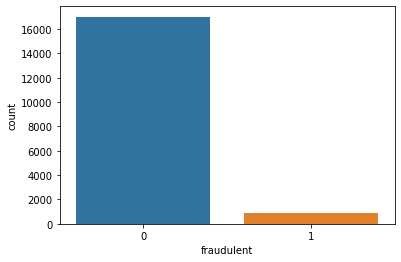

In [9]:
sns.countplot(df.fraudulent)

In [10]:
df[df.fraudulent == 1].shape

(866, 18)

In [11]:
#Balancing Dataset

In [12]:
target_one = df[df.fraudulent == 1]
target_zero = shuffle(df[df.fraudulent == 0]).iloc[:int(2*target_one.shape[0])]

In [13]:
print(target_one.shape)
print(target_zero.shape)

(866, 18)
(1732, 18)


In [14]:
df = target_one.append(target_zero)

In [15]:
df.shape

(2598, 18)

In [16]:
df = shuffle(df)

In [17]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
8654,8655,Production Supervisor,"US, TX, Houston",NaN,40000-45000,"Founded in 1993, our group has, in a few short...",Oversee plant operations.Monitor and troublesh...,Flexible ScheduleMinimum 5 years experience.Kn...,16.00/hr as starting pay + performance bonus,0,1,1,Full-time,NaN,NaN,Media Production,Manufacturing,1
937,938,Health & Environmental Professional,"US, CA, Bakersfield",Refined Resources,70000-120000,Aptitude Staffing Solutions has redesigned the...,,Responsibilities:Duties and Responsibilities:M...,Please Apply for Immediate Consideration Qual...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1
17665,17666,Call Center Representative,"US, IL, CHICAGO",NaN,1000-2000,NaN,Duties and Responsibilities:Answer Call Center...,QUALIFICATIONSHigh school diploma/GED required...,Compensation/benefits package includes:Compreh...,0,0,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17776,17777,Administrative Assistant,"US, TX, Houston",NaN,NaN,"Founded in 1993, our group has, in a few short...","Duties / Responsibilities:- Data entry, genera...",- Flexible Schedule- Minimum 2 years’ experien...,Compensation: 12.00 per hour as starting pay +...,0,1,1,Full-time,Entry level,Unspecified,Media Production,Administrative,1


In [18]:
#Exploring all the columns

In [19]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000
mean,9450.405697,0.054657,0.647421,0.439184,0.333333
std,5521.222554,0.227354,0.477865,0.496383,0.471495
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4735.750000,0.000000,0.000000,0.000000,0.000000
50%,9032.500000,0.000000,1.000000,0.000000,0.000000
75%,14511.500000,0.000000,1.000000,1.000000,1.000000
max,17871.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 8654 to 4145
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               2598 non-null   int64 
 1   title                2598 non-null   object
 2   location             2551 non-null   object
 3   department           964 non-null    object
 4   salary_range         465 non-null    object
 5   company_profile      1724 non-null   object
 6   description          2597 non-null   object
 7   requirements         2173 non-null   object
 8   benefits             1561 non-null   object
 9   telecommuting        2598 non-null   int64 
 10  has_company_logo     2598 non-null   int64 
 11  has_questions        2598 non-null   int64 
 12  employment_type      2035 non-null   object
 13  required_experience  1506 non-null   object
 14  required_education   1384 non-null   object
 15  industry             1857 non-null   object
 16  fun

In [21]:
#Checking amount of null values

In [22]:
for col in df.columns:
    series = df[col]
    type_set = set(type(i) for i in series)
    print("{0}: {1}".format(col,type_set))

job_id: {<class 'int'>}
title: {<class 'str'>}
location: {<class 'float'>, <class 'str'>}
department: {<class 'float'>, <class 'str'>}
salary_range: {<class 'float'>, <class 'str'>}
company_profile: {<class 'float'>, <class 'str'>}
description: {<class 'float'>, <class 'str'>}
requirements: {<class 'float'>, <class 'str'>}
benefits: {<class 'float'>, <class 'str'>}
telecommuting: {<class 'int'>}
has_company_logo: {<class 'int'>}
has_questions: {<class 'int'>}
employment_type: {<class 'float'>, <class 'str'>}
required_experience: {<class 'float'>, <class 'str'>}
required_education: {<class 'float'>, <class 'str'>}
industry: {<class 'float'>, <class 'str'>}
function: {<class 'float'>, <class 'str'>}
fraudulent: {<class 'int'>}


In [23]:
for col in df.columns:
    null_val = df[col].isna().sum()
    null_val = format(null_val/df.shape[0],'.2f')
    print("{0}: {1}% null values".format(col,null_val))

job_id: 0.00% null values
title: 0.00% null values
location: 0.02% null values
department: 0.63% null values
salary_range: 0.82% null values
company_profile: 0.34% null values
description: 0.00% null values
requirements: 0.16% null values
benefits: 0.40% null values
telecommuting: 0.00% null values
has_company_logo: 0.00% null values
has_questions: 0.00% null values
employment_type: 0.22% null values
required_experience: 0.42% null values
required_education: 0.47% null values
industry: 0.29% null values
function: 0.36% null values
fraudulent: 0.00% null values


In [24]:
#Columnwise exploration

In [25]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [26]:
one = df[df.fraudulent == 1]
zero = df[df.fraudulent == 0]

In [27]:
df.job_id

8654      8655
937        938
17665    17666
3            4
17776    17777
         ...  
1379      1380
17565    17566
16413    16414
6287      6288
4145      4146
Name: job_id, Length: 2598, dtype: int64

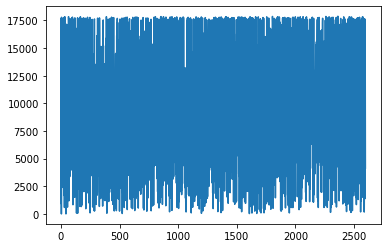

In [28]:
x = range(1,len(df.job_id)+1)
y = df.job_id
plt.plot(x,y)

In [29]:
print(df.job_id.isna().sum())

0


In [30]:
print(one.job_id.isna().sum()/one.shape[0])
print(zero.job_id.isna().sum()/zero.shape[0])

0.0
0.0


In [31]:
df.title

8654                                 Production Supervisor
937                    Health & Environmental Professional
17665                           Call Center Representative
3                        Account Executive - Washington DC
17776                            Administrative Assistant 
                               ...                        
1379                            DevOps / DB Admin Engineer
17565    Home Based Payroll Typist/Data Entry Clerks Po...
16413                                          UI Engineer
6287                                   Production Engineer
4145                                         Payroll Clerk
Name: title, Length: 2598, dtype: object

In [32]:
df.title.isna().sum()

0

In [33]:
print(one.title.isna().sum()/one.shape[0])
print(zero.title.isna().sum()/zero.shape[0])

0.0
0.0


In [34]:
df.department

8654                    NaN
937       Refined Resources
17665                   NaN
3                     Sales
17776                   NaN
                ...        
1379            Engineering
17565              Clerical
16413                   NaN
6287            Engineering
4145     Accounting/Payroll
Name: department, Length: 2598, dtype: object

In [35]:
df.department.isna().sum()

1634

In [36]:
df.department.unique()

array([nan, 'Refined Resources', 'Sales', 'admin', 'Engineering',
       'Marketing', 'CSR', 'Accounting/Payroll', 'CSR CENTER', 'Business',
       'Tech', 'Unknown', 'Customer Service', 'Business Development',
       'Research & Development', 'IT Services', 'Financial Dept',
       'Client Services', 'Support', 'Finance and Acccount',
       'Software Development', 'Oil & Energy', 'Engineering ',
       'WWAREHOUSE ASSOCIATE', 'SALES ', 'Retail', 'Field Services',
       'Administrative', 'Clerical', 'Head Start', 'Operations',
       'Controls Engineer', 'Information Technology', 'Work at home',
       'Development', 'Accounting', 'SALES', 'Creative Services', 'R&D',
       'OPS', 'Tecnologia', 'COMPLIANCE UNIT 701', 'Core Team',
       'Family Services', 'HQ ', 'Recon GL Accounting', 'Oil and Gas',
       'CSD Relay', 'GCS', 'Information Technology ', 'Driver Operations',
       'Customer Support', 'SA', 'Social Media', 'ENGINEERING', 'IT',
       'RN', 'Product', 'Finance', 'Custom

In [37]:
df.department.isna().sum()

1634

In [38]:
print(one.department.isna().sum()/one.shape[0])
print(zero.department.isna().sum()/zero.shape[0])

0.6131639722863741
0.6368360277136259


In [39]:
df['salary_range']

8654      40000-45000
937      70000-120000
17665       1000-2000
3                 NaN
17776             NaN
             ...     
1379              NaN
17565             NaN
16413             NaN
6287              NaN
4145              NaN
Name: salary_range, Length: 2598, dtype: object

In [40]:
df['salary_range'].unique()

array(['40000-45000', '70000-120000', '1000-2000', nan, '1000-1000',
       '13-20', '55-105', '40000-50000', '35000-40000', '100000-180000',
       '30000-50000', '40000-70000', '28000-35000', '60-150',
       '45000-45000', '200000-240000', '23000-26000', '25000-25000',
       '48000-55000', '15750-15750', '1000-3000', '21-63000',
       '25000-30000', '250000-500000', '22000-30000', '21-31',
       '65000-70000', '80000-140000', '30000-40000', '26000-30000',
       '200000-700000', '45000-55000', '140000-150000', '80000-120000',
       '80000-110000', '50000-80000', '25000-35000', '55-72', '1517-1517',
       '40000-65000', '18000-25000', '60000-100000', '40000-120000',
       '53000-67000', '95000-115000', '100000-110000', '20000-50000',
       '35000-45000', '55000-75000', '28000-30000', '120000-130000',
       '55-65', '90000-120000', '65000-80000', '30000-45000',
       '10000-100000', '30000-60000', '23000-28000', '0-0',
       '200000-600000', '60000-90000', '7200-1380000', '6

In [41]:
df['salary_range'].isna().sum()

2133

In [42]:
print(one.salary_range.isna().sum()/one.shape[0])
print(zero.salary_range.isna().sum()/zero.shape[0])

0.7424942263279446
0.8602771362586605


In [43]:
df['company_profile']

8654     Founded in 1993, our group has, in a few short...
937      Aptitude Staffing Solutions has redesigned the...
17665                                                  NaN
3        Our passion for improving quality of life thro...
17776    Founded in 1993, our group has, in a few short...
                               ...                        
1379     Transifex is a SaaS continuous localization pl...
17565                                                  NaN
16413    Shapeways is the leading 3D printing marketpla...
6287                                                   NaN
4145     At DynCorp International it is our commitment ...
Name: company_profile, Length: 2598, dtype: object

In [44]:
df.company_profile.isna().sum()

874

In [45]:
print(one.company_profile.isna().sum()/one.shape[0])
print(zero.company_profile.isna().sum()/zero.shape[0])

0.6778290993071594
0.16570438799076212


In [46]:
# Most fraudulent job openings don't have a company profile

In [47]:
df['description']

8654     Oversee plant operations.Monitor and troublesh...
937                                                       
17665    Duties and Responsibilities:Answer Call Center...
3        THE COMPANY: ESRI – Environmental Systems Rese...
17776    Duties / Responsibilities:- Data entry, genera...
                               ...                        
1379     Transifex aims to be the all-in-one localizati...
17565    We have several openings available in this are...
16413    If you are a front-end engineer who is familia...
6287     Corporate overviewAker Solutions is a global p...
4145     Payroll Clerk Job Purpose: Responsible for Com...
Name: description, Length: 2598, dtype: object

In [48]:
df.description.isna().sum()

1

In [49]:
df['requirements']

8654     Flexible ScheduleMinimum 5 years experience.Kn...
937      Responsibilities:Duties and Responsibilities:M...
17665    QUALIFICATIONSHigh school diploma/GED required...
3        EDUCATION: Bachelor’s or Master’s in GIS, busi...
17776    - Flexible Schedule- Minimum 2 years’ experien...
                               ...                        
1379     Network – understanding &amp; troubleshooting ...
17565    Basic computer and typing skills, ability to s...
16413    Ability to manage time in a startup culture an...
6287     Qualifications &amp; personal attributes Time ...
4145     Required Tools Needed below:1. A good computer...
Name: requirements, Length: 2598, dtype: object

In [50]:
df.requirements.isna().sum()

425

In [51]:
print(one.requirements.isna().sum()/one.shape[0])
print(zero.requirements.isna().sum()/zero.shape[0])

0.17782909930715934
0.1564665127020785


In [52]:
df['benefits']

8654          16.00/hr as starting pay + performance bonus
937       Please Apply for Immediate Consideration Qual...
17665    Compensation/benefits package includes:Compreh...
3        Our culture is anything but corporate—we have ...
17776    Compensation: 12.00 per hour as starting pay +...
                               ...                        
1379     Stock optionsCompetitive salariesPaid time off...
17565    All you need is access to the Internet and you...
16413    Why join our team?Shapeways is breaking new gr...
6287     We offer• Friendly colleagues in an industry w...
4145                                                   NaN
Name: benefits, Length: 2598, dtype: object

In [53]:
df['benefits'].isna().sum()

1037

In [54]:
print(one.benefits.isna().sum()/one.shape[0])
print(zero.benefits.isna().sum()/zero.shape[0])

0.42032332563510394
0.38856812933025403


In [55]:
df['telecommuting']

8654     0
937      0
17665    0
3        0
17776    0
        ..
1379     0
17565    0
16413    0
6287     0
4145     0
Name: telecommuting, Length: 2598, dtype: int64

In [56]:
df['telecommuting'].isna().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


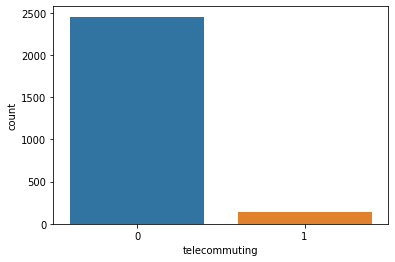

In [57]:
sns.countplot(df['telecommuting'])

In [58]:
df['has_company_logo']

8654     1
937      1
17665    0
3        1
17776    1
        ..
1379     1
17565    0
16413    1
6287     0
4145     1
Name: has_company_logo, Length: 2598, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


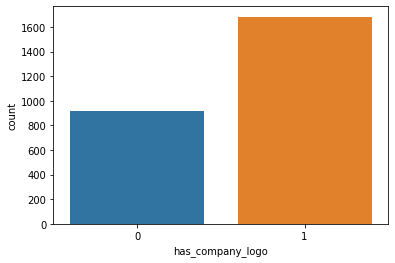

In [59]:
sns.countplot(df['has_company_logo'])

In [60]:
df['has_company_logo'].isna().sum()

0

In [61]:
print("Fraudulent and logo: {0}".format(one[one.has_company_logo == 1].shape[0]/one.shape[0]))

Fraudulent and logo: 0.32678983833718245


In [62]:
print("Non fraudulent and logo: {0}".format(zero[zero.has_company_logo == 1].shape[0]/zero.shape[0]))

Non fraudulent and logo: 0.8077367205542725


In [63]:
#Most non fraudulent jobs have company logo

In [64]:
print("Fraudulent and no logo: {0}".format(one[one.has_company_logo == 0].shape[0]/one.shape[0]))

Fraudulent and no logo: 0.6732101616628176


In [65]:
print("Non fraudulent and no logo: {0}".format(zero[zero.has_company_logo == 0].shape[0]/zero.shape[0]))

Non fraudulent and no logo: 0.1922632794457275


In [66]:
#Most fraudulent jobs don't have a company logo

In [67]:
df['has_questions']

8654     1
937      1
17665    0
3        0
17776    1
        ..
1379     1
17565    0
16413    0
6287     0
4145     0
Name: has_questions, Length: 2598, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


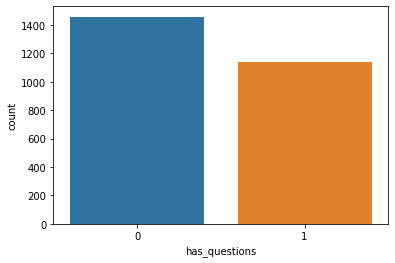

In [68]:
sns.countplot(df['has_questions'])

In [69]:
df['has_questions'].isna().sum()

0

In [70]:
print("Fraudulent and questions: {0}".format(one[one.has_questions == 1].shape[0]/one.shape[0]))

print("Non fraudulent and questions: {0}".format(zero[zero.has_questions == 1].shape[0]/zero.shape[0]))

Fraudulent and questions: 0.28868360277136257
Non fraudulent and questions: 0.5144341801385681


In [71]:
print("Fraudulent and no questions: {0}".format(one[one.has_questions == 0].shape[0]/one.shape[0]))

print("Non fraudulent and no questions: {0}".format(zero[zero.has_questions == 0].shape[0]/zero.shape[0]))

Fraudulent and no questions: 0.7113163972286374
Non fraudulent and no questions: 0.4855658198614319


In [72]:
#Most fraudulent jobs don't have questions

In [73]:
df['employment_type'].unique()

array(['Full-time', nan, 'Contract', 'Other', 'Part-time', 'Temporary'],
      dtype=object)

In [74]:
df['employment_type'].isna().sum()

563

In [75]:
print(one.employment_type.isna().sum()/one.shape[0])
print(zero.employment_type.isna().sum()/zero.shape[0])

0.27829099307159355
0.1859122401847575


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


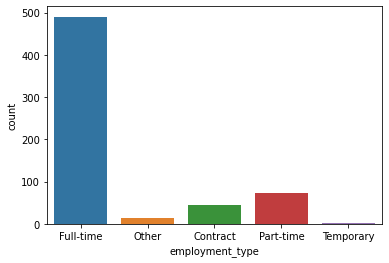

In [76]:
sns.countplot(one.employment_type)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


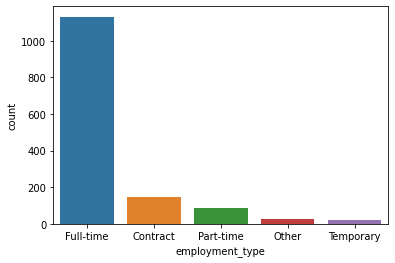

In [77]:
sns.countplot(zero.employment_type)

In [78]:
df['required_experience']

8654                  NaN
937      Mid-Senior level
17665         Entry level
3        Mid-Senior level
17776         Entry level
               ...       
1379          Entry level
17565                 NaN
16413                 NaN
6287                  NaN
4145          Entry level
Name: required_experience, Length: 2598, dtype: object

In [79]:
df['required_experience'].isna().sum()

1092

In [80]:
print(one.required_experience.isna().sum()/one.shape[0])
print(zero.required_experience.isna().sum()/zero.shape[0])

0.5023094688221709
0.37933025404157045


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


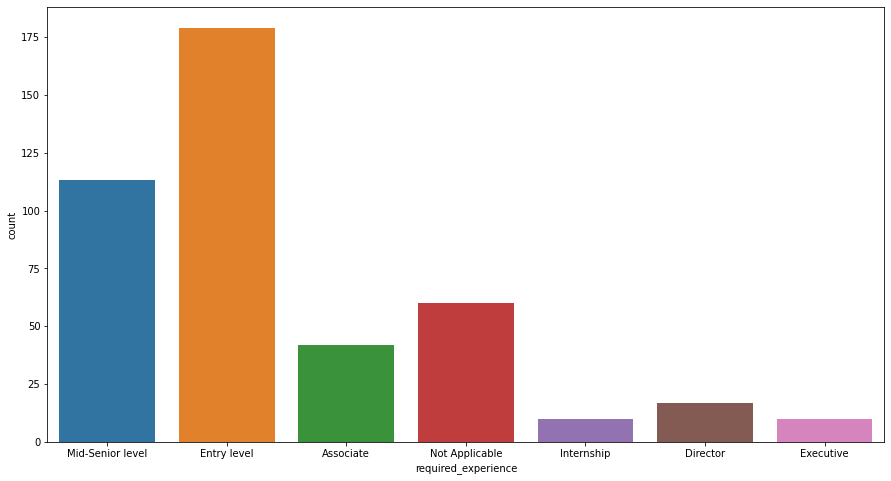

In [81]:
plt.figure(figsize=(15,8))
sns.countplot(one.required_experience)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


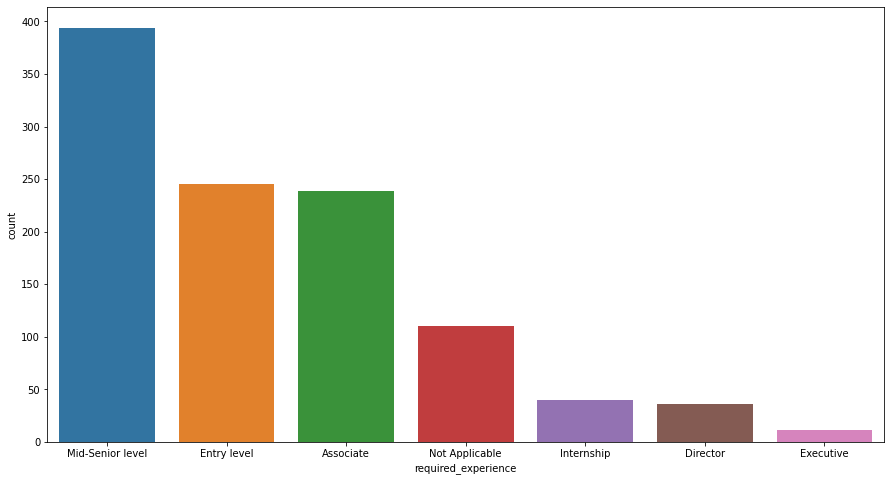

In [82]:
plt.figure(figsize=(15,8))
sns.countplot(zero.required_experience)

In [83]:
#Mostly "Entry level jobs" are fraudulent

In [84]:
df['required_education']

8654                           NaN
937              Bachelor's Degree
17665    High School or equivalent
3                Bachelor's Degree
17776                  Unspecified
                   ...            
1379             Bachelor's Degree
17565                          NaN
16413                          NaN
6287                           NaN
4145     High School or equivalent
Name: required_education, Length: 2598, dtype: object

In [85]:
df['required_education'].isna().sum()

1214

In [86]:
print(one.required_education.isna().sum()/one.shape[0])
print(zero.required_education.isna().sum()/zero.shape[0])

0.5207852193995381
0.4405311778290993


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

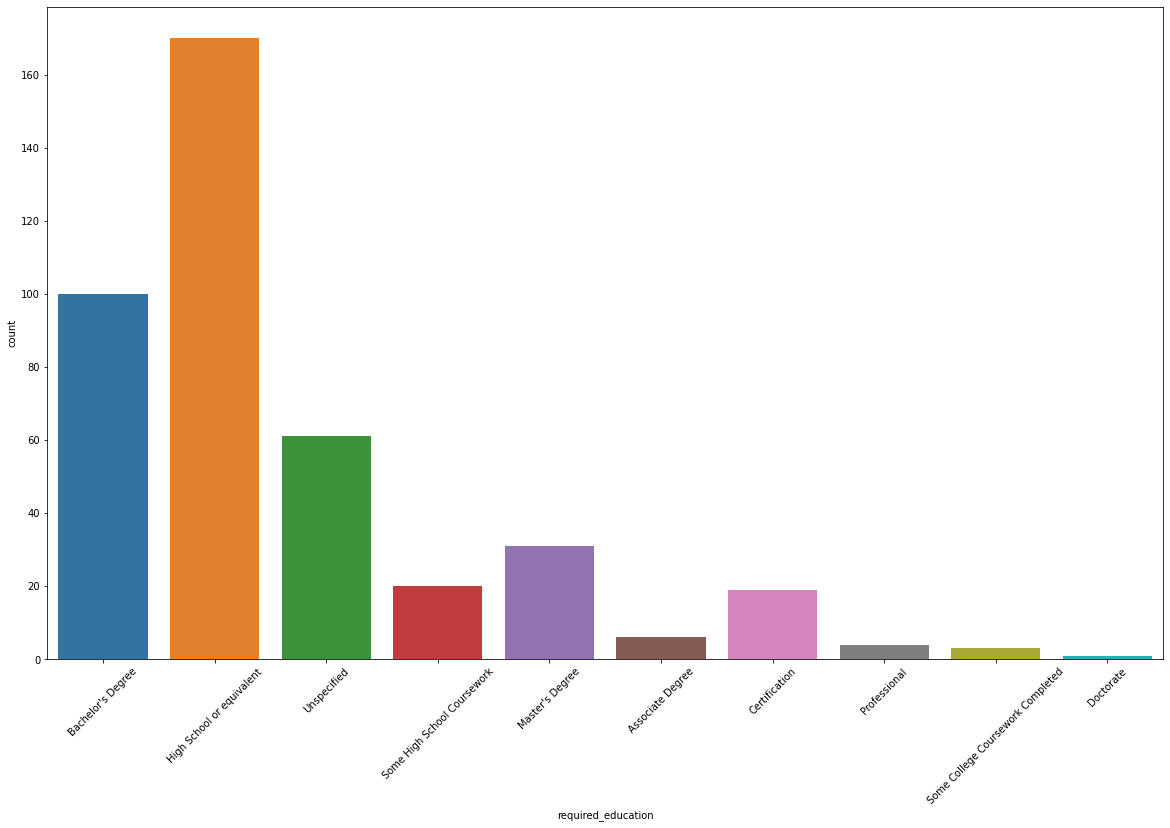

In [87]:
plt.figure(figsize=(20,12))
sns.countplot(one.required_education)
plt.xticks(rotation=45)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

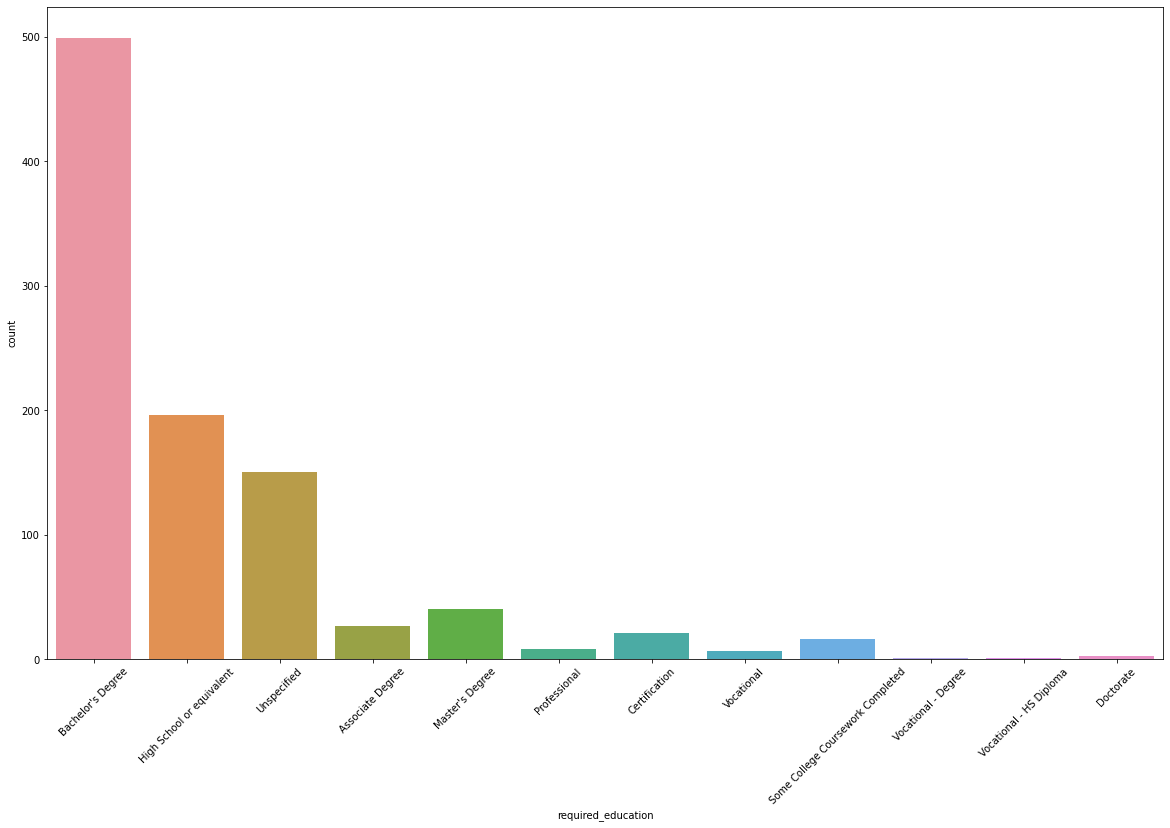

In [88]:
plt.figure(figsize=(20,12))
sns.countplot(zero.required_education)
plt.xticks(rotation=45)

In [89]:
df['industry']

8654                        Media Production
937                             Oil & Energy
17665                     Telecommunications
3                          Computer Software
17776                       Media Production
                        ...                 
1379     Information Technology and Services
17565                                    NaN
16413    Information Technology and Services
6287                            Oil & Energy
4145                              Accounting
Name: industry, Length: 2598, dtype: object

In [90]:
df['industry'].isna().sum()

741

In [91]:
print(one.industry.isna().sum()/one.shape[0])
print(zero.industry.isna().sum()/zero.shape[0])

0.31755196304849886
0.2690531177829099


In [92]:
df['function']

8654        Manufacturing
937                 Other
17665    Customer Service
3                   Sales
17776      Administrative
               ...       
1379          Engineering
17565                 NaN
16413         Engineering
6287          Engineering
4145              Finance
Name: function, Length: 2598, dtype: object

In [93]:
df['function'].isna().sum()

947

In [94]:
print(one.function.isna().sum()/one.shape[0])
print(zero.function.isna().sum()/zero.shape[0])

0.3891454965357968
0.35219399538106233


### Data Preparation

In [95]:
for col in df.columns:
    nulls = df[col].isna().sum()
    if nulls > 600:
        df = df.drop(columns=[col])

In [96]:
df.shape

(2598, 10)

In [97]:
x = df.location.apply(lambda x: str(x).split(',')[-1])

In [98]:
df.employment_type.unique()

array(['Full-time', nan, 'Contract', 'Other', 'Part-time', 'Temporary'],
      dtype=object)

In [99]:
x = np.array(x)

In [100]:
df.columns

Index(['job_id', 'title', 'location', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'fraudulent'],
      dtype='object')

Separating train and test indices

In [101]:
print(df.shape)

(2598, 10)


In [102]:
df2 = df.dropna()
print(df2.shape)

(1738, 10)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


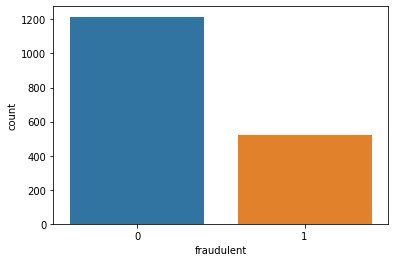

In [103]:
sns.countplot(df2.fraudulent)

In [104]:
df2.columns

Index(['job_id', 'title', 'location', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'fraudulent'],
      dtype='object')

In [105]:
df2 = df2.drop(columns=['job_id','title','location','description','requirements'])

In [106]:
df2 = df2.dropna()

In [107]:
df2 = pd.get_dummies(df2)

In [108]:
df2.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary'],
      dtype='object')

In [109]:
df2.head(5)

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary
8654,0,1,1,1,0,1,0,0,0
937,0,1,1,1,0,1,0,0,0
17665,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0
17776,0,1,1,1,0,1,0,0,0


In [110]:
df2.shape

(1738, 9)

### Train and test split

In [111]:
df2.head(5)

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary
8654,0,1,1,1,0,1,0,0,0
937,0,1,1,1,0,1,0,0,0
17665,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0
17776,0,1,1,1,0,1,0,0,0


In [112]:
y = df2['fraudulent']
X = df2.drop(columns=['fraudulent'])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Models

In [114]:
models = []
acc = []
roc_auc = []
f1 = []

In [115]:
accuracy_score = metrics.accuracy_score
roc_auc_score = metrics.roc_auc_score
f1_score = metrics.f1_score

In [116]:
df2.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary'],
      dtype='object')

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['fraudulent']),df2.fraudulent,test_size=0.2,random_state=0)

In [118]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1390, 8)
(348, 8)
(1390,)
(348,)


1. Voting Classifiers

Voting classifiers
Taking all models that performed well in project 1. Models are:
1. KNN with 2 neighbors
2. Logistic Regression
3. Linear SVC with l2 penalty and crammer-singer as multi_class
4. SVC with 'rbf' kernel and C as 0.1
5. Decision tree classifier as 'gini' criteria and 5 maximum depth

In [119]:
knn = KNeighborsClassifier(n_neighbors=2)
lr = LogisticRegression(random_state=0)
svc_l2 = LinearSVC(penalty='l2',multi_class='crammer_singer',dual=False,random_state=0)
svc_rbf = SVC(kernel='rbf',C=0.1,random_state=0)
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5)

Hard voting classifiers

In [120]:
eclf = VotingClassifier(estimators=[('knn',knn),('lr',lr),('svc_l2',svc_l2),('svc_rbf',svc_rbf),('dtc',dtc)], voting='hard')

In [121]:
eclf = eclf.fit(X_train,y_train)

In [122]:
y_pred = eclf.predict(X_test)

In [123]:
train_pred = eclf.predict(X_train)
print("Train: \n")
print("Accuracy: {}".format(accuracy_score(y_train,train_pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_train,train_pred)))
print("F1_score: {}".format(f1_score(y_train,train_pred)))

Train: 

Accuracy: 0.7820143884892087
Roc_Auc_Score: 0.6909889058166334
F1_score: 0.5615050651230101


In [124]:
models.append('Hard voting clf')
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

Soft voting classifiers

In [125]:
svc_l2 = SVC(kernel='linear',random_state=0,probability=True)
svc_rbf = SVC(kernel='rbf',C=0.1,random_state=0,probability=True)

In [126]:
eclf2 = VotingClassifier(estimators=[('knn',knn),('lr',lr),('svc_l2',svc_l2),('svc_rbf',svc_rbf),('dtc',dtc)], voting='soft')

In [127]:
eclf2 = eclf2.fit(X_train,y_train)

In [128]:
y_pred2 = eclf2.predict(X_test)

In [129]:
train_pred2 = eclf2.predict(X_train)
print("Train: \n")
print("Accuracy: {}".format(accuracy_score(y_train,train_pred2)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_train,train_pred2)))
print("F1_score: {}".format(f1_score(y_train,train_pred2)))

Train: 

Accuracy: 0.7827338129496403
Roc_Auc_Score: 0.6921681510996522
F1_score: 0.5635838150289016


In [130]:
models.append('Soft voting clf')
acc.append(accuracy_score(y_test,y_pred2))
roc_auc.append(roc_auc_score(y_test,y_pred2))
f1.append(f1_score(y_test,y_pred2))

Bagging
Taking best two models in the project 1:
1. Decision tree with 'gini' criteria and max_depth = 5
2. SVC with 'rbf' kernel and C = 0.1

In [131]:
n_es = [5,10,25,50,100]

In [132]:
best_score,best_est, best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=5),n_estimators=n,random_state=0)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.7031020408163264
0.7031020408163264
0.7031020408163264
0.7071020408163264
0.7071020408163264
0.7071020408163264 50


In [133]:
models.append("DT_gini_5_bag_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

In [134]:
best_score,best_est,best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = BaggingClassifier(base_estimator=SVC(kernel='rbf',C=0.1,random_state=0),n_estimators=n,random_state=0)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.7111020408163266
0.7060000000000001
0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266 5


In [135]:
models.append("SVC_rbf_c_0.1_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

Pasting (No bootstrapping)

In [136]:
best_score,best_est,best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=5),n_estimators=n,random_state=0,bootstrap=False)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266 5


In [137]:
models.append("DT_gini_5_pasting_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

In [138]:
best_score,best_est,best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = BaggingClassifier(base_estimator=SVC(kernel='rbf',C=0.1,random_state=0),n_estimators=n,random_state=0,bootstrap=False)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266
0.7111020408163266 5


In [139]:
models.append("SVC_rbf_c_0.1_pasting_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

Adaboosting Taking best two models in the project 1:
1. Decision tree with 'gini' criteria and max_depth = 5
2. SVC with 'rbf' kernel and C = 0.1

In [140]:
best_score,best_est,best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=5),n_estimators=n,random_state=0)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.7020000000000001
0.6980000000000001
0.6960000000000001
0.6960000000000001
0.6960000000000001
0.7020000000000001 5


In [141]:
models.append("DT_gini_5_Adaboost_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

In [142]:
best_score,best_est,best_pred = -1,-1,[]
for n in n_es:
  dtc_bag = AdaBoostClassifier(base_estimator=SVC(kernel='rbf',C=0.1,random_state=0,probability=True),n_estimators=n,random_state=0)
  dtc_bag = dtc_bag.fit(X_train,y_train)
  y_pred_bag1 = dtc_bag.predict(X_test)
  score = roc_auc_score(y_test,y_pred_bag1)
  print(score)
  if best_score < score:
    best_score = score
    best_est = n
    best_pred = y_pred_bag1
print(best_score,best_est)

0.5
0.5
0.5
0.5
0.5
0.5 5


In [143]:
models.append("SVC_rbf_c_0.1_Adaboosting_n_est_{0}".format(best_est))
acc.append(accuracy_score(y_test,best_pred))
roc_auc.append(roc_auc_score(y_test,best_pred))
f1.append(f1_score(y_test,best_pred))

Gradientboosting

In [144]:
parameters = {'loss':('deviance', 'exponential'),'learning_rate':[0.01,0.1,1],'n_estimators':n_es,\
              'criterion':('friedman_mse', 'mse', 'mae'),'max_depth':[3,5]}

In [145]:
gbclf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),param_grid=parameters)

In [146]:
gbclf = gbclf.fit(X_train,y_train)

In [147]:
y_pred_gbclf = gbclf.predict(X_test)

In [148]:
y_pred_train = gbclf.predict(X_train)
print("Train: ")
print("Accuracy_score: {}".format(accuracy_score(y_train,y_pred_train)))
print("Roc_Auc_score: {}".format(roc_auc_score(y_train,y_pred_train)))
print("F1_score: {}".format(f1_score(y_train,y_pred_train)))

Train: 
Accuracy_score: 0.7827338129496403
Roc_Auc_score: 0.6921681510996522
F1_score: 0.5635838150289016


In [149]:
models.append("GradientBoosting")
acc.append(accuracy_score(y_test,y_pred_gbclf))
roc_auc.append(roc_auc_score(y_test,y_pred_gbclf))
f1.append(f1_score(y_test,y_pred_gbclf))

PCA

In [150]:
print(models)

['Hard voting clf', 'Soft voting clf', 'DT_gini_5_bag_n_est_50', 'SVC_rbf_c_0.1_n_est_5', 'DT_gini_5_pasting_n_est_5', 'SVC_rbf_c_0.1_pasting_n_est_5', 'DT_gini_5_Adaboost_n_est_5', 'SVC_rbf_c_0.1_Adaboosting_n_est_5', 'GradientBoosting']


In [151]:
pca = PCA(0.95)

In [152]:
X_train1 = pca.fit_transform(X_train)

In [153]:
pca.n_components_

5

In [154]:
X_test1 = pca.transform(X_test)

In [155]:
print(X_train1.shape,X_test1.shape)

(1390, 5) (348, 5)


In [156]:
#Hard voting
eclf_pca = eclf.fit(X_train1,y_train)
y_pred = eclf_pca.predict(X_test1)
models.append('Hard voting clf pca')
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [157]:
#Soft voting
eclf2_pca = eclf2.fit(X_train1,y_train)
y_pred = eclf2_pca.predict(X_test1)
models.append('Soft voting clf pca')
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [158]:
#Decision tree bagging
dtc_bag_pca = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=5),n_estimators=50,random_state=0)
dtc_bag_pca = dtc_bag.fit(X_train1,y_train)
y_pred = dtc_bag_pca.predict(X_test1)
models.append("DT_gini_5_bag_n_est_50_pca")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [159]:
#SVC bagging
svc_bag_pca = BaggingClassifier(base_estimator=SVC(kernel='rbf',C=0.1,random_state=0),n_estimators=5,random_state=0)
svc_bag_pca = svc_bag_pca.fit(X_train1,y_train)
y_pred = svc_bag_pca.predict(X_test1)
models.append("SVC_rbf_c_0.1_n_est_5_pca")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [160]:
#Adaboost
dtc_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=5),n_estimators=5,random_state=0)
dtc_adaboost = dtc_adaboost.fit(X_train1,y_train)
y_pred = dtc_adaboost.predict(X_test1)
models.append("DT_gini_5_Adaboost_n_est_5_pca")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [161]:
#Gradient boosting
gbclf_pca = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),param_grid=parameters)
gbclf_pca = gbclf_pca.fit(X_train1,y_train)
y_pred = gbclf_pca.predict(X_test1)
models.append("GradientBoosting_pca")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

Deep Learning


---


MLP Classifier

In [162]:
mlp = MLPClassifier(activation='relu',solver='adam',alpha=0.001,batch_size=16,random_state=0)

In [163]:
clf = mlp.fit(X_train,y_train)
y_pred = clf.predict(X_test)
models.append("MLP Classifier")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [164]:
clf2 = mlp.fit(X_train1,y_train)
y_pred = clf.predict(X_test1)
models.append("MLP Classifier pca")
acc.append(accuracy_score(y_test,y_pred))
roc_auc.append(roc_auc_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

Comparing models

In [165]:
models_df = pd.DataFrame({'model_name':models,'acc_score':acc,'roc_auc_score':roc_auc,'f1_score':f1})

In [166]:
models_df

,model_name,acc_score,roc_auc_score,f1_score
0,Hard voting clf,0.793103,0.707102,0.581395
1,Soft voting clf,0.790230,0.702000,0.573099
2,DT_gini_5_bag_n_est_50,0.793103,0.707102,0.581395
3,SVC_rbf_c_0.1_n_est_5,0.798851,0.711102,0.588235
4,DT_gini_5_pasting_n_est_5,0.798851,0.711102,0.588235
5,SVC_rbf_c_0.1_pasting_n_est_5,0.798851,0.711102,0.588235
6,DT_gini_5_Adaboost_n_est_5,0.790230,0.702000,0.573099
7,SVC_rbf_c_0.1_Adaboosting_n_est_5,0.718391,0.500000,0.000000
8,GradientBoosting,0.793103,0.704000,0.576471
9,Hard voting clf pca,0.790230,0.702000,0.573099


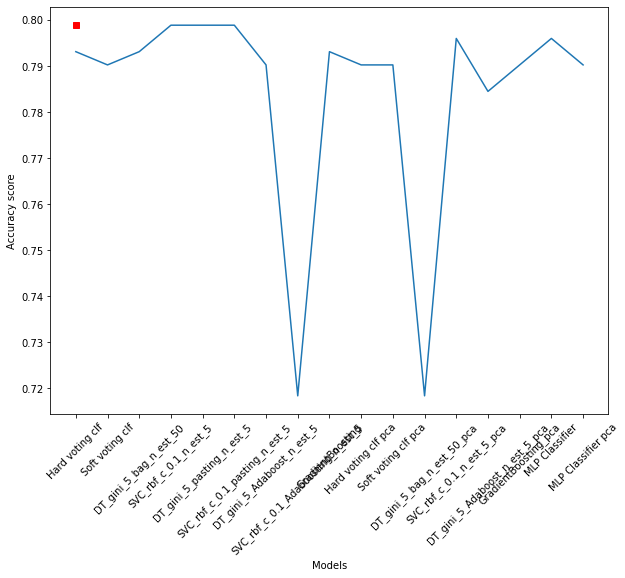

In [167]:
#Accuracy plot
plt.figure(figsize=(10,7.5))
plt.plot(models_df.model_name,models_df.acc_score)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.plot(max(models_df.acc_score),'rs')
plt.xticks(rotation=45)
plt.show()

In [168]:
#max accuracy
models_df[models_df.acc_score == max(models_df.acc_score)]

,model_name,acc_score,roc_auc_score,f1_score
3,SVC_rbf_c_0.1_n_est_5,0.798851,0.711102,0.588235
4,DT_gini_5_pasting_n_est_5,0.798851,0.711102,0.588235
5,SVC_rbf_c_0.1_pasting_n_est_5,0.798851,0.711102,0.588235


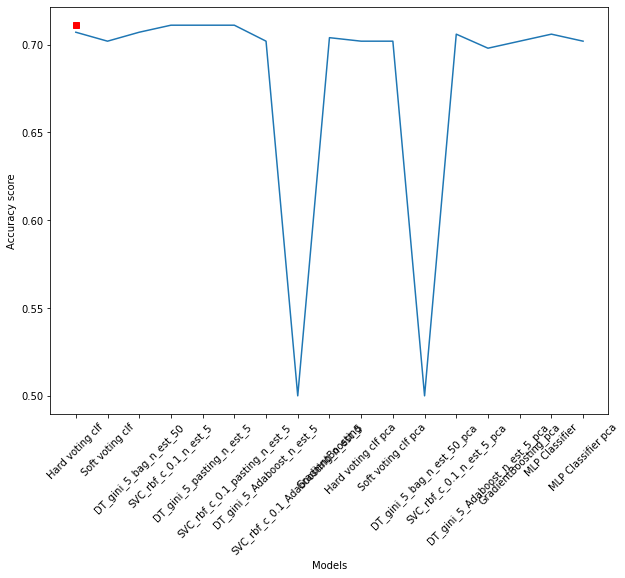

In [169]:
#ROC AUC score plot
plt.figure(figsize=(10,7.5))
plt.plot(models_df.model_name,models_df.roc_auc_score)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.plot(max(models_df.roc_auc_score),'rs')
plt.xticks(rotation=45)
plt.show()

In [170]:
#max roc_auc_score
models_df[models_df.roc_auc_score == max(models_df.roc_auc_score)]

,model_name,acc_score,roc_auc_score,f1_score
3,SVC_rbf_c_0.1_n_est_5,0.798851,0.711102,0.588235
4,DT_gini_5_pasting_n_est_5,0.798851,0.711102,0.588235
5,SVC_rbf_c_0.1_pasting_n_est_5,0.798851,0.711102,0.588235


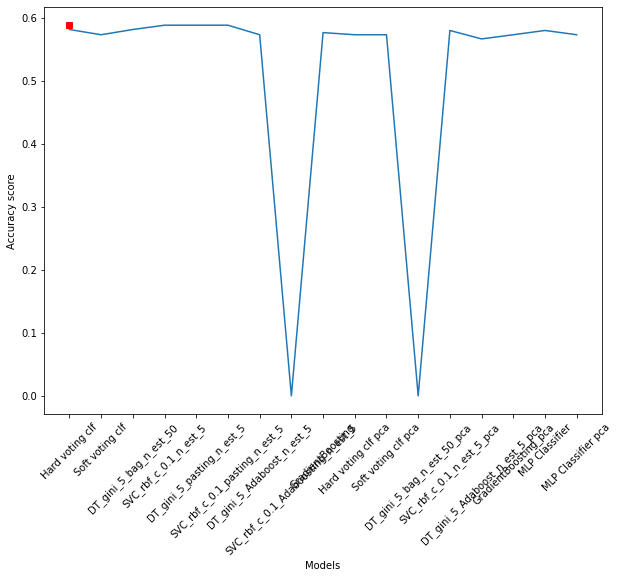

In [171]:
#F1 score plot
plt.figure(figsize=(10,7.5))
plt.plot(models_df.model_name,models_df.f1_score)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.plot(max(models_df.f1_score),'rs')
plt.xticks(rotation=45)
plt.show()

In [172]:
#max f1_score
models_df[models_df.f1_score == max(models_df.f1_score)]

,model_name,acc_score,roc_auc_score,f1_score
3,SVC_rbf_c_0.1_n_est_5,0.798851,0.711102,0.588235
4,DT_gini_5_pasting_n_est_5,0.798851,0.711102,0.588235
5,SVC_rbf_c_0.1_pasting_n_est_5,0.798851,0.711102,0.588235


## Natural Language Processing and LSTM model

In [173]:
#Text based classification

In [174]:
df = pd.read_csv("fake_job_postings.csv")

In [175]:
df['job_description'] = df['title'] + " " + df['description']

In [176]:
df = df[['fraudulent','job_description']]

In [177]:
df[df.fraudulent == 1].shape

(866, 2)

In [178]:
df[df.fraudulent == 0].shape

(17014, 2)

In [179]:
one_df = df[df.fraudulent == 1]
zero_df = shuffle(df[df.fraudulent == 0])[:int(len(one_df)*1.5)]

In [180]:
print(one_df.shape,zero_df.shape)

(866, 2) (1299, 2)


In [181]:
df = one_df.append(zero_df)
df = shuffle(df)

In [182]:
df.shape

(2165, 2)

In [183]:
def clean_text(x):
  puncts = string.punctuation
  new_str = ""
  for i in x:
    if i not in puncts:
      new_str += str(i)
  x = new_str.split(' ')
  x = [str(i) for i in x if i not in stop_words]
  x = [i.lower() for i in x]
  return " ".join(x)

df['job_description'] = df['job_description'].fillna('')

df['job_description'] = df['job_description'].apply(lambda x: clean_text(x))

In [184]:
all_words = ''
for i in df['job_description']:
  all_words += ' ' + i + ' '

len(all_words)

2134359

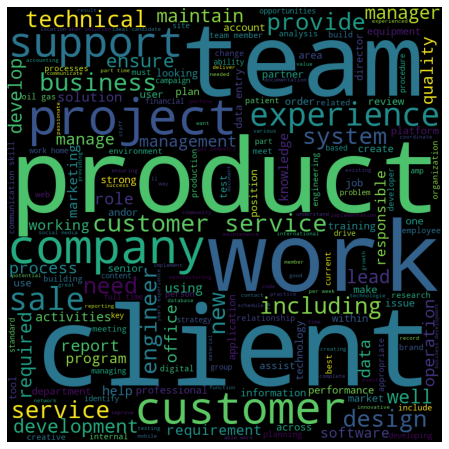

In [185]:
wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10).generate(all_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.show() 

In [186]:
word_dic = {}
for i in range(len(df['job_description'])):
  desc = df['job_description'].iloc[i]
  desc = desc.split(' ')
  for word in desc:
    if word in word_dic:
      word_dic[word] += 1
    else:
      word_dic[word] = 1

print(len(word_dic))

29211


In [187]:
less_occuring_words = []
for word,occurence in word_dic.items():
  if occurence == 1:
    less_occuring_words.append(word)

print(len(less_occuring_words))

17629


In [188]:
all_words = all_words.split(' ')
more_occuring_words = [word for word in all_words if word not in less_occuring_words]

In [189]:
more_occuring_words = set(more_occuring_words)

new_set = set()
special_chars = ['”','’s','\xa0','•']
for word in more_occuring_words:
  new_str = word
  for char in special_chars:
    if new_str.find(char):
      new_str = new_str.replace(char,' ')
  new_set.add(new_str)

more_occuring_words = new_set

temp_words = less_occuring_words[0]

In [190]:
replace_dict = {}
for less_occ in less_occuring_words:
  replace_str = ""
  for more_occ in more_occuring_words:
    if less_occ.find(more_occ):
      replace_str += more_occ + " "
  replace_dict[less_occ] = replace_str

len(replace_dict) == len(less_occuring_words)

True

In [191]:
def clean2(x):
  x = x.split(' ')
  new_str = []
  for word in x:
    if word not in less_occuring_words and len(word) < 15 and len(word) > 2:
      new_str.append(word)
  return " ".join(new_str)

df['job_description'] = df['job_description'].apply(lambda x: clean2(x))

In [192]:
max_seq_len = 0
for i in df['job_description']:
  max_seq_len = max(max_seq_len,len(i))
print(max_seq_len)

all_seq_lengths = [len(i) for i in df['job_description']]

max_seq_len = max(all_seq_lengths)
min_seq_len = min(all_seq_lengths)
mean_seq_len = np.mean(all_seq_lengths)
median_seq_len = np.median(all_seq_lengths)
print("Max = {0}\nMin = {1}\nMean = {2}\nMedian = {3}".format(max_seq_len,min_seq_len,mean_seq_len,median_seq_len))

6358
Max = 6358
Min = 0
Mean = 794.9173210161663
Median = 628.0


No handles with labels found to put in legend.


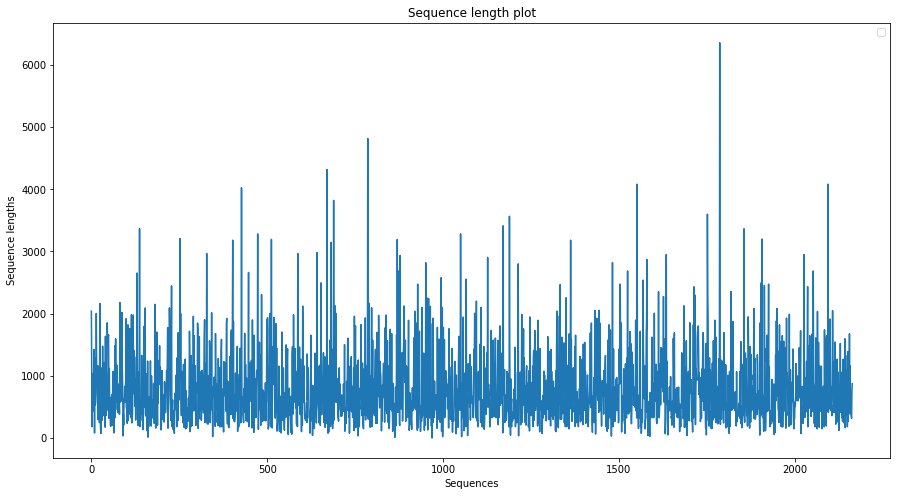

In [193]:
plt.figure(figsize=(15,8))
plt.plot(all_seq_lengths)
plt.xlabel("Sequences")
plt.ylabel("Sequence lengths")
plt.title("Sequence length plot")
plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 1080x576 with 0 Axes>

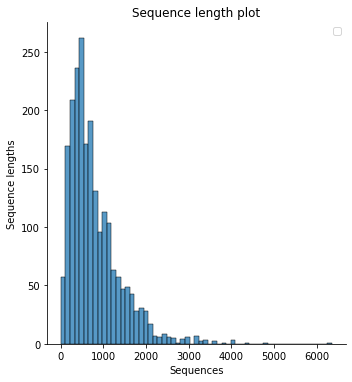

In [194]:
plt.figure(figsize=(15,8))
sns.displot(all_seq_lengths)
plt.xlabel("Sequences")
plt.ylabel("Sequence lengths")
plt.title("Sequence length plot")
plt.legend()
plt.show()

In [195]:
seq_word_len = []
for i in df['job_description']:
  words = i.split(' ')
  seq_word_len.append(len(words))

print(np.max(seq_word_len))
print(np.min(seq_word_len))
print(np.mean(seq_word_len))
print(np.median(seq_word_len))

749
1
97.7958429561201
78.0


In [196]:
temp_df = df[['job_description','fraudulent']]
temp_df

,job_description,fraudulent
14574,product copywriter looking product copywriters...,0
7473,franciscan francis health apply using alongsid...,1
9700,english teacher abroad play kids get paid it l...,0
10886,automation engineer spothero about making life...,0
17570,work home mca associates receive 8000 eighty d...,1
...,...,...
15558,digital marketing manager seosem hayes corp lo...,0
5451,entry arise virtual solutions business process...,1
17603,call center representative want work fastpaced...,1
8201,environmental health safety community engageme...,0


In [197]:
one_size = len(temp_df[temp_df.fraudulent == 1])
zero_size = len(temp_df[temp_df.fraudulent == 0])

print(one_size, zero_size)

866 1299


In [198]:
one_df = temp_df[temp_df.fraudulent == 1]
zero_df = temp_df[temp_df.fraudulent == 0]

train_df = one_df[:int(0.8*len(one_df))].append(zero_df[:int(0.8*len(zero_df))])
test_df = one_df[int(0.8*len(one_df)):].append(zero_df[int(0.8*len(zero_df)):])
print(train_df.shape,test_df.shape)

(1731, 2) (434, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


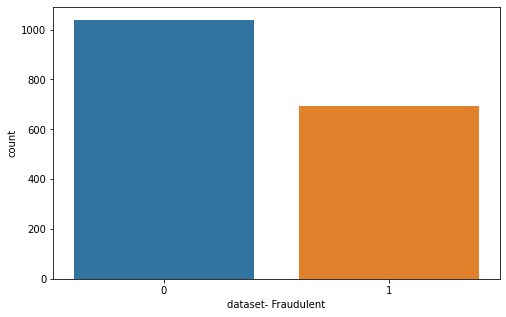

In [199]:
plt.figure(figsize=(8,5))
sns.countplot(train_df.fraudulent)
plt.plot()
plt.xlabel("dataset- Fraudulent")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


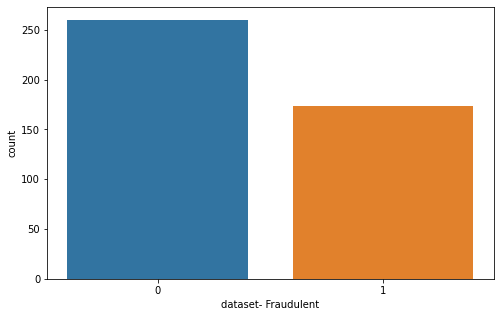

In [200]:
plt.figure(figsize=(8,5))
sns.countplot(test_df.fraudulent)
plt.plot()
plt.xlabel("dataset- Fraudulent")
plt.show()

In [221]:
max_words = int(np.max(seq_word_len))
max_len = int(np.median(seq_word_len))
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_df['job_description'])
sequences = tok.texts_to_sequences(train_df['job_description'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [222]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [223]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 78)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 78, 50)            37450     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [224]:
model.fit(sequences_matrix,train_df['fraudulent'],batch_size=16,epochs=25, validation_split=0.25)

Epoch 1/25
82/82 [==============================] - 4s 49ms/step - loss: 0.6096 - accuracy: 0.6610 - val_loss: 0.5502 - val_accuracy: 0.7506
Epoch 2/25
82/82 [==============================] - 4s 44ms/step - loss: 0.4095 - accuracy: 0.8282 - val_loss: 0.4013 - val_accuracy: 0.8591
Epoch 3/25
82/82 [==============================] - 4s 44ms/step - loss: 0.3349 - accuracy: 0.8613 - val_loss: 0.5764 - val_accuracy: 0.7413
Epoch 4/25
82/82 [==============================] - 4s 44ms/step - loss: 0.2789 - accuracy: 0.8898 - val_loss: 1.8484 - val_accuracy: 0.5473
Epoch 5/25
82/82 [==============================] - 3s 43ms/step - loss: 0.2323 - accuracy: 0.9083 - val_loss: 0.3124 - val_accuracy: 0.8961
Epoch 6/25
82/82 [==============================] - 4s 44ms/step - loss: 0.1902 - accuracy: 0.9222 - val_loss: 0.7312 - val_accuracy: 0.7206
Epoch 7/25
82/82 [==============================] - 3s 42ms/step - loss: 0.1563 - accuracy: 0.9453 - val_loss: 0.6459 - val_accuracy: 0.8083
Epoch 8/25
82

In [225]:
pred = model.predict(sequences_matrix)

In [226]:
pred = [int(i) for i in pred]

In [227]:
accuracy_score(train_df.fraudulent,pred)

0.9532062391681109

In [228]:
sequences = tok.texts_to_sequences(test_df['job_description'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
y_pred = model.predict(sequences_matrix)

In [229]:
y_pred = [int(i) for i in y_pred]

In [230]:
accuracy_score(test_df.fraudulent,y_pred)

0.8294930875576036